# Jan 19 - English text preprocessing basics

Unstructured text - text you find in the wild in books and websites - is generally not amenable to analysis. Before it can be analyzed, the text needs to be standardized to a format so that Python can recognize each unit of meaning (called a "token") as unique, no matter how many times it occurs and how it is stylized. 

* Remove punctuation and special characters/symbols
* Remove stop words
* Stem or lemmatize: convert all non-base words to their base form 

Stemming/lemmatization and stop words (and some punctuation) are language-specific. NLTK works for English out-of-the-box, but you'll need different code to work with other languages. Some languages (e.g. Chinese) also require *segmentation*: artificially inserting spaces between words. If you want to do text pre-processing for other languages, please let us know and we can put together a notebook for you.

In [1]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
import pandas as pd
import seaborn as sns
from collections import Counter
import regex as re

In [2]:
# ensure you have the proper nltk modules
import nltk
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [3]:
pwd

'C:\\Users\\Francisco\\Desktop\\Python\\1. MA_Paper'

In [4]:
#Corpus

AM = open(r'C:\Users\Francisco\Desktop\Python\1. MA_Paper\1. Corpus\\AM-lemmatized.txt', encoding = 'utf-8').read()
DF = open(r'C:\Users\Francisco\Desktop\Python\1. MA_Paper\1. Corpus\\DF-lemmatized.txt', encoding = 'utf-8').read()
GO = open(r'C:\Users\Francisco\Desktop\Python\1. MA_Paper\1. Corpus\\GO-lemmatized.txt', encoding = 'utf-8').read()
MG = open(r'C:\Users\Francisco\Desktop\Python\1. MA_Paper\1. Corpus\\MG-lemmatized.txt', encoding = 'utf-8').read()
MT = open(r'C:\Users\Francisco\Desktop\Python\1. MA_Paper\1. Corpus\\MT-lemmatized.txt', encoding = 'utf-8').read()
PA = open(r'C:\Users\Francisco\Desktop\Python\1. MA_Paper\1. Corpus\\PA-lemmatized.txt', encoding = 'utf-8').read()
PE = open(r'C:\Users\Francisco\Desktop\Python\1. MA_Paper\1. Corpus\\PE-lemmatized.txt', encoding = 'utf-8').read()
SC = open(r'C:\Users\Francisco\Desktop\Python\1. MA_Paper\1. Corpus\\SC-lemmatized.txt', encoding = 'utf-8').read()
SP = open(r'C:\Users\Francisco\Desktop\Python\1. MA_Paper\1. Corpus\\SP-lemmatized.txt', encoding = 'utf-8').read()
BNCC = open(r'C:\Users\Francisco\Desktop\Python\1. MA_Paper\1. Corpus\\BNCC-lemmatized.txt', encoding = 'utf-8').read() 

In [5]:
text = AM + DF + GO + MG + MT + PA + PE + SC + SP
#
# print just the first 100 characters
print(text[:10])

APRESENTAÇ


In [6]:
corpusdf = pd.DataFrame([AM, DF, GO, MG, MT, PA, PE, SC, SP, BNCC])
#

In [7]:
estados = ['Amazonas', 'Distrito Federal', 'Goias', 'Minas Gerais', 'Mato Grosso', 'Parana', 'Pernambuco', 'Santa Catarina', 'Sao Paulo', 'BNCC']
corpusdf['Estado'] = estados

In [8]:
corpusdf = corpusdf.rename(columns={0 : 'Curricula'})

In [9]:
names = corpusdf['Estado']
descriptions = corpusdf['Curricula']

# TF IDF

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import json
import glob
import re

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
stopw = stopwords.words("portuguese")

In [13]:
# This is not working, I don't understand why

other_stops = ['ensino', 'mato grosso', 'Mato Grosso', 'ensino fundamental', 'ensino médio', 'acesso em', 'paulista', 'Minas Gerais', 'minas', 'Pernambuco', 'Distrito Federal', 'currículo referência', 'secretaria', 'de estado', 'Secretaria', 'de Estado', 'SECRETARIA DE', 'DE', 'Amazonas']

In [14]:
stops = other_stops + stopw

In [15]:
import string
from nltk.corpus import stopwords
import re

def remove_stops(text, stops):
    #All learning objectives have a code in the document. This removes that code: e.g. EM13CS20
    text1 = re.sub(r"[a-zA-Z][a-zA-Z]\d\d[aA-zZ][aA-zZ]", "", text)
    text2 = re.sub(r"[a-zA-Z][a-zA-Z][a-zA-Z]\d\d[aA-zZ][aA-zZ]", "", text1)
 
    
    #removes all stop words, including months
    words = text2.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
            
    #reassembles the text without stop words
    final = " ".join(final)
    
    #removes all punctuation
    final = final.translate(str.maketrans("", "", string.punctuation))
    
    #removes all numbers
    final = "".join([i for i in final if not i.isdigit()])
    
    #eliminates double white spaces
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

def clean_docs(docs):
       
    #empty new list to store the cleaned docs
    final = []
    
    #iterate over all docs and cleans them to be a
    #single sentence with no unwanted words
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    
    return(final)

In [16]:
cleaned_docs = clean_docs(descriptions)

In [17]:
filtered_sentence = [w for w in cleaned_docs if not w.lower() in stops]
 
filtered_sentence = []
 
for w in cleaned_docs:
    if w not in stops:
        filtered_sentence.append(w)

In [18]:
cleaned_docs = filtered_sentence

In [19]:
# A lot of this section comes from the Scikit Learn documentation and various blogs including the following:
#https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

## Setting up the parameters for the clustering

In [20]:
vectorizer = TfidfVectorizer(lowercase=True, max_df = 6, min_df = 2, ngram_range = (2,2))

In [21]:
vectors = vectorizer.fit_transform(cleaned_docs)

In [22]:
tfidf_df = pd.DataFrame(vectors.todense(), columns = vectorizer.get_feature_names())
tfidf_df

,abaixar apresentar,abaixar competência,abaixar médio,abaixar possibilidade,abaixar quadro,abaixo listado,abandonar escolar,abarcar aspecto,abarcar complexidade,abarcar múltiplo,...,único instituição,único modelar,único modo,único respostar,único saúde,único ser,único temer,único viés,útil análise,útil sistematização
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006502,0.000000,0.000000,0.000000,...,0.006502,0.000000,0.000000,0.000000,0.000000,0.006502,0.000000,0.000000,0.000000,0.006502
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006580,0.000000,...,0.006580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001405,0.000000,0.000000,0.001405,0.000000,0.000000,0.000000
4,0.006134,0.004089,0.002045,0.002045,0.004089,0.000000,0.000000,0.002045,0.000000,0.002045,...,0.000000,0.002045,0.000000,0.002045,0.000000,0.004089,0.000000,0.002045,0.000000,0.004089
5,0.000000,0.000000,0.001959,0.001959,0.003919,0.001959,0.000000,0.000000,0.000000,0.001959,...,0.000000,0.000000,0.001714,0.000000,0.001714,0.000000,0.000000,0.003919,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001975,0.000000,0.000000,...,0.000000,0.001975,0.001728,0.000000,0.005184,0.000000,0.000000,0.000000,0.001975,0.000000
7,0.000781,0.000781,0.000000,0.000000,0.000000,0.000781,0.001562,0.000000,0.000781,0.000000,...,0.000000,0.000000,0.000683,0.000000,0.006832,0.000000,0.000781,0.000000,0.000781,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
tfidf_df.max().sort_values(ascending = False).head(n = 50)

mato grosso                   0.779001
minas gerais                  0.669756
base ensino                   0.664758
currículo referência          0.664293
distrito federal              0.648201
ano semestre                  0.643926
currículo base                0.549314
gêneros estudar               0.439293
referência rede               0.401423
santa catarina                0.325640
eixos temáticos               0.277361
carga horária                 0.233174
oficial união                 0.223444
união brasília                0.216673
diário oficial                0.216673
longo unidade                 0.215524
pessoal individual            0.188572
curricular avaliação          0.186134
curricular ementa             0.185672
texto atos                    0.171143
campo jornalístico            0.164978
posicionamento responsável    0.163364
mundo ideologia               0.163364
temer visão                   0.163364
réplica posicionamento        0.159475
semanal carga            

In [24]:
feature_names = vectorizer.get_feature_names()

In [25]:
dense = vectors.todense()

In [26]:
denselist = dense.tolist()

In [27]:
all_keywords = []
for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)

In [28]:
true_k = 3

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

In [29]:
model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [30]:
i = 0
for cluster in order_centroids:
    print (f"Cluster {i}")
    for keyword in cluster[0:10]:
        print (terms[keyword])
    print ("")
    i=i+1

Cluster 0
base ensino
currículo base
santa catarina
carga horária
oficial união
diário oficial
união brasília
longo unidade
curricular avaliação
semanal carga

Cluster 1
mato grosso
minas gerais
currículo referência
ano semestre
texto atos
organizador curricular
atos linguagem
temer visão
mundo ideologia
posicionamento responsável

Cluster 2
distrito federal
currículo referência
gêneros estudar
referência rede
eixos temáticos
língua espanhola
referência língua
prática análise
instituição educacional
aprendizagem reconhecer



In [31]:
#A lot of this section was obtained from https://stackoverflow.com/questions/27494202/how-do-i-visualize-data-points-of-tf-idf-vectors-for-kmeans-clustering

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [32]:
kmean_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

In [33]:


colors = ["r", "b", "m", "y", "c"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]



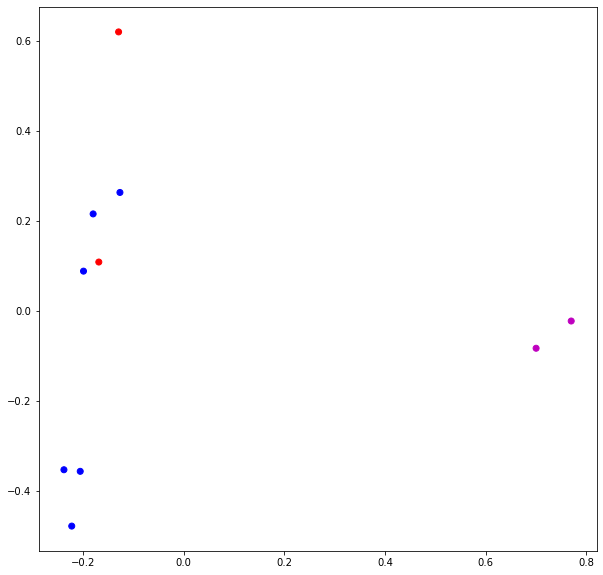

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

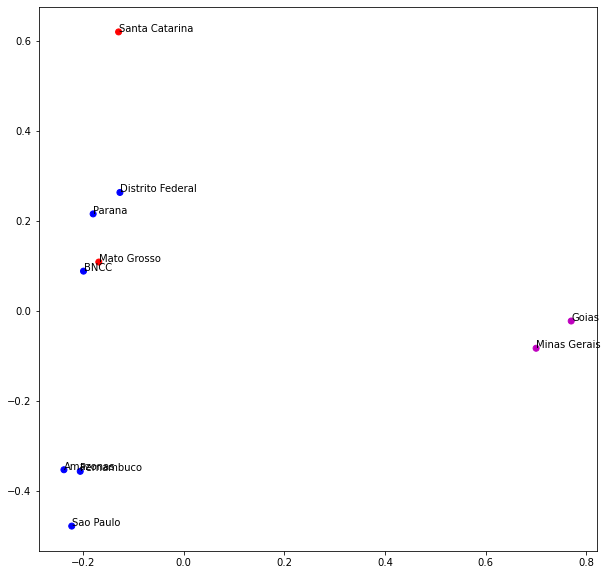

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
for i, txt in enumerate(names):
    ax.annotate(txt, (x_axis[i], y_axis[i]))